<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# 03 - Practical exercise - Solution - Ground-based I

### About

> Let us now return to the dust event in March 2022. As you recall, the dust outbreak lasted for a week from 15 to 22 March 2022 and extended across the Mediterranean Sea up as far as northern Europe. ([Source](https://www.eumetsat.int/widespread-dust-intrusion-across-europe))
> 
> Today, you will focus on station observations from [European Environmental Agency (EEA) AirBase](https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8) and lidar data from [European Aerosol Research Lidar Network (EARLINET)](https://www.earlinet.org/index.php?id=125). You will look for a dust transport signal in the EARLINET data and evaluate the evolution of this dust event over time at a specific location, with EEA ground-based data for air quality.




### Tasks

#### 1. Brainstorm
  * What ground-based observation datasets do you know about?
  * Which variables do they measure?
  * What are some advantages and limitations of ground-based data?

#### 2. Download and plot the 532nm particle depolarization profiles EARLINET data for *Granada, Spain*
  * Download and visualise 532nm particle depolarization profiles at the station *Granada, Spain* for 19 to 20 March 2022.
  * **Some questions to reflect on**
    * Between 15-22 March 2022, which days do we have observations for?
    * Why may data not be available for the whole period?
  * **Hint** 
    * [EARLINET observations - Example notebook](../04_data_workflows/42_groundbased_observations/422_EARLINET.ipynb)
    * Data access: [EARLINET Data Portal](https://data.earlinet.org/earlinet/)
    * Example code has been provided but you have to fill in the blanks.
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()`
    * To filter columns, you can either use the pandas method [filter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html) or [query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).

#### 3. Load, browse and visualise 532nm backscatter EARLINET data for Granada, Spain
  * Modify the example code from the previous section to visualise the 532nm backscatter data for the same station and times.

#### 4. [BONUS] Plot the backscatter climatological average profile for the March 2000-2019 period for *Granada, Spain*
  * **Hint**
    * Data access: Download the *Level 3 Profiles* data at [EARLINET Level 3 climatological dataset](https://www.earlinet.org/index.php?id=319)
    * The acronym for Granada is `gra` which is the name of the folder containing the station data.
    * Use the normal monthly dataset, selecting the month of March. The file has `NorMon` in the filename.
  * **Question to reflect on**
    * Try adding the March climatological average profile to the backscatter plots you made in Part 3. 
    * What can you conclude about the March 2022 dust event when comparing with the climatological average profile? 

#### 5. Write a code cell for downloading EEA Air Quality data for PM10 for Spain in 2022
  * Note that EEA Air Quality data takes a long time to download as the entire country's data is downloaded. Thus, we have pre-downloaded this data for you. You simply need to check that your code cell matches the solution for this download call.
  * **Hint** 
    * [EEA Air Quality - Example notebook](../04_data_workflows/42_groundbased_observations/423_EEA_Air_Quality.ipynb)


#### 6. Plot the PM10 for the month of March 2022 for *Granada, Spain*
  * Use the map below to look for the closest PM10 station to Granada, Spain. 
  * Take note of the `AirQualityStationEoICode` or station code of this station.
  * This exercise focuses only on PM10. The closest PM2.5 station is `VÍZNAR` but it has no available data for this time period.

In [1]:
%%HTML

<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1RRfBHto5r5Z-01wZIXe62dqQWbUR9c5b&ehbc=2E312F" width="640" height="480"></iframe>


#### 5. Interpret the plotting results.
  * Was the PM10 air quality threshold exceeded at *Granada, Spain* during this dust event?
  * Compare the backscatter and particle depolarisation profiles from March 2022 with the long-term climatological profile. What are your conclusions?
  * Compare these ground-based data with the SEVIRI Dust RGB [online](https://sds-was.aemet.es/forecast-products/dust-observations/msg-2013-eumetsat) and the MODIS Natural Colour RGB [online](https://go.nasa.gov/3WTHjOW). Why is it a good idea to use both ground-based and satellite observations together?

### Module outline
* [1 - Download and plot the 532nm particle depolarization profiles EARLINET data for Granada, Spain](#particle)
* [2 - Load, browse and visualise 532nm backscatter EARLINET data for Granada, Spain](#backscatter)
* [3 - BONUS: Download and plot the backscatter climatological average profile for the March 2000-2019 period for *Granada, Spain*](#climatology)
* [4 - Write code for downloading EEA Air Quality data for PM10](#eea_download)
* [5 - Plot the PM10 data for the month of March 2022 for Granada, Spain](#eea_plot)


<hr>

##### Load required libraries

In [2]:
import wget
import numpy as np
import pandas as pd
import xarray as xr
import airbase

import matplotlib.pyplot as plt

##### Load helper functions

In [3]:
%run ../functions.ipynb

<hr>

### <a id='particle'></a>1. Download and plot the 532nm particle depolarization profiles EARLINET data for Granada, Spain

#### Load 532nm EARLINET data on 19 March 2022

EARLINET 532nm data is downloaded in a zip archive and for this reason, we have to unzip the file before we can open it. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. You will see 20 new files appearing in a new folder called `earlinet` located in the same folder as this notebook. This is just for demonstration purposes.

In [4]:
#import zipfile
#with zipfile.ZipFile('../../eodata/dust/part2/2_observations/earlinet/level1/DATASET_1877.zip', 'r') as zip_ref:
#    zip_ref.extractall('./earlinet/')

EARLINET data are disseminated as hourly files in the `NetCDF` format. You can use the Python package [xarray](http://xarray.pydata.org/en/stable/) and the function `open_mfdataset()` to open multiple `NetCDF` at once, concatenating along the `time` dimension. Let us load the data files for the EARLINET station Granada, Spain for 19 March 2022.

The function loads the data as `Dataset`, which is a collection of multiple data variables that share the same coordinate information. Below, you see that the EARLINET data have four dimensions: `altitude`, `time`, `nv` and `wavelength`.

The data also hold 30 data variables, including a variable `backscatter`, which is the variable of interest for us. If you want to use the files you downloaded, please change the file path below.

In [5]:
earlinet_1903 = xr.open_mfdataset('../../eodata/dust/part2/2_observations/earlinet/level1/*20220319*.nc', 
                         concat_dim='time', 
                         combine='nested')
earlinet_1903

<xarray.Dataset>
Dimensions:                                         (altitude: 156, time: 11, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 1.37e+...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 532.0
    longitude                                       float32 -3.605
    latitude                                        float32 37.16
Dimensions without coordinates: nv
Data variables: (12/30)
    time_bounds                                     (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    error_retrieval_method                          (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                                              ...
    earlinet_product_type                           (time) float64 6.0 ... 6.0
    user_defined_category                           (time) float64 0.0 ... 0.0
    backscatter_calibration_range                   (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (time) float64 0.0 ... 0.0
    scc_product_type                                (time) float64 1.0 ... 1.0
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2022-03-29T07:43Z : Assigned versio...
    station_ID:                           gra
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           gra_008_0000669_202203190200_202203...
    overlap_correction_file:

EARLINET Lidar sensors create vertical profiles of the atmosphere. Let us inspect the variable `altitude` in order to see the resolution and extent of the vertical profile. You see that the EARLINET 532nm data offer measurements for every 60 meters from 1370m up to 10.55km.

In [6]:
earlinet_1903.altitude

<xarray.DataArray 'altitude' (altitude: 156)>
array([ 1370.,  1430.,  1490.,  1550.,  1610.,  1670.,  1730.,  1790.,  1850.,
        1910.,  1970.,  2030.,  2090.,  2150.,  2210.,  2270.,  2330.,  2390.,
        2450.,  2510.,  2570.,  2630.,  2690.,  2750.,  2810.,  2870.,  2930.,
        2990.,  3050.,  3110.,  3170.,  3230.,  3290.,  3350.,  3410.,  3470.,
        3530.,  3590.,  3650.,  3710.,  3770.,  3830.,  3890.,  3950.,  4010.,
        4070.,  4130.,  4190.,  4250.,  4310.,  4370.,  4430.,  4490.,  4550.,
        4610.,  4670.,  4730.,  4790.,  4850.,  4910.,  4970.,  5030.,  5090.,
        5150.,  5210.,  5270.,  5330.,  5390.,  5450.,  5510.,  5570.,  5630.,
        5690.,  5750.,  5810.,  5870.,  5930.,  5990.,  6050.,  6110.,  6170.,
        6230.,  6290.,  6350.,  6410.,  6470.,  6530.,  6590.,  6650.,  6710.,
        6770.,  6830.,  6890.,  6950.,  7010.,  7070.,  7130.,  7190.,  7250.,
        7310.,  7370.,  7430.,  7490.,  7550.,  7610.,  7670.,  7730.,  7790.,
        7850.,  7910.,  7970.,  8030.,  8090.,  8150.,  8210.,  8270.,  8330.,
        8390.,  8450.,  8510.,  8570.,  8630.,  8690.,  8750.,  8810.,  8870.,
        8930.,  8990.,  9050.,  9110.,  9170.,  9230.,  9290.,  9350.,  9410.,
        9470.,  9530.,  9590.,  9650.,  9710.,  9770.,  9830.,  9890.,  9950.,
       10010., 10070., 10130., 10190., 10250., 10310., 10370., 10430., 10490.,
       10550., 10610., 10670.])
Coordinates:
  * altitude   (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
    longitude  float32 -3.605
    latitude   float32 37.16
Attributes:
    axis:           Z
    long_name:      height above sea level
    positive:       up
    standard_name:  altitude
    units:          m

#### Load 532nm EARLINET data on 20 March 2022

Let us now also load the 532nm EARLINET data for the station in Granada, Spain for 20th March 2022 respectively. We repeat the same steps as above. First, we load the 532nm EARLINET data as xarray.Dataset with the function `open_mfdataset()`.

In [7]:
earlinet_2003 = xr.open_mfdataset('../../eodata/dust/part2/2_observations/earlinet/level1/*20220320*.nc', 
                         concat_dim='time', 
                         combine='nested')

earlinet_2003

<xarray.Dataset>
Dimensions:                                         (altitude: 156, time: 9, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 1.37e+...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 532.0
    longitude                                       float32 -3.605
    latitude                                        float32 37.16
Dimensions without coordinates: nv
Data variables: (12/30)
    time_bounds                                     (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    error_retrieval_method                          (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                                              ...
    earlinet_product_type                           (time) float64 6.0 ... 6.0
    user_defined_category                           (time) float64 0.0 ... 0.0
    backscatter_calibration_range                   (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (time) float64 0.0 ... 0.0
    scc_product_type                                (time) float64 1.0 ... 1.0
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2022-03-29T07:42Z : Assigned versio...
    station_ID:                           gra
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           gra_008_0000669_202203200100_202203...
    overlap_correction_file:

#### Load and browse 532nm particle depolarization profiles on 19 and 20 March 2022

The first step is to select the variable of interest which is `particledepolarization`. You will notice that it has 3 dimensions, namely `wavelength`, `time` and `altitude`.

In [8]:
particle_1903 = earlinet_1903['particledepolarization']
particle_1903

<xarray.DataArray 'particledepolarization' (wavelength: 1, time: 11, altitude: 156)>
dask.array<concatenate, shape=(1, 11, 156), dtype=float64, chunksize=(1, 1, 156), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
  * time        (time) datetime64[ns] 2022-03-19T02:00:15 ... 2022-03-19T23:0...
  * wavelength  (wavelength) float32 532.0
    longitude   float32 -3.605
    latitude    float32 37.16
Attributes:
    long_name:     aerosol linear depolarization ratio
    plausibility:  parameter not quality assured by EARLINET.
    units:         1

In [9]:
particle_2003 = earlinet_2003['particledepolarization']
particle_2003

<xarray.DataArray 'particledepolarization' (wavelength: 1, time: 9, altitude: 156)>
dask.array<concatenate, shape=(1, 9, 156), dtype=float64, chunksize=(1, 1, 156), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
  * time        (time) datetime64[ns] 2022-03-20T01:00:36.999999744 ... 2022-...
  * wavelength  (wavelength) float32 532.0
    longitude   float32 -3.605
    latitude    float32 37.16
Attributes:
    long_name:     aerosol linear depolarization ratio
    plausibility:  parameter not quality assured by EARLINET.
    units:         1

You can save the variables `particle_longname` for plotting later.

In [10]:
particle_longname = particle_2003.long_name
particle_longname

'aerosol linear depolarization ratio'

Next, you will plot the profiles as a line chart for the following dates and times: 
   * 19 March 2022:
       * 08:00 UTC
       * 18:17 UTC
       * 23:00 UTC
   * 20 March 2022:
       * 06:00 UTC
       * 12:00 UTC
       * 17:00 UTC

Time-series information is better to handle via the Python library [Pandas](https://pandas.pydata.org/). You can use the function `to_dataframe()` to convert a xarray.DataArray into a pandas.DataFrame.

In [11]:
particle_1903_df = particle_1903.to_dataframe()
particle_1903_df

longitude   latitude  \
wavelength time                altitude                         
532.0      2022-03-19 02:00:15 1370.0       -3.605  37.164001   
                               1430.0       -3.605  37.164001   
                               1490.0       -3.605  37.164001   
                               1550.0       -3.605  37.164001   
                               1610.0       -3.605  37.164001   
...                                            ...        ...   
           2022-03-19 23:00:39 10430.0      -3.605  37.164001   
                               10490.0      -3.605  37.164001   
                               10550.0      -3.605  37.164001   
                               10610.0      -3.605  37.164001   
                               10670.0      -3.605  37.164001   

                                         particledepolarization  
wavelength time                altitude                          
532.0      2022-03-19 02:00:15 1370.0                       NaN  
                               1430.0                       NaN  
                               1490.0                       NaN  
                               1550.0                       NaN  
                               1610.0                       NaN  
...                                                         ...  
           2022-03-19 23:00:39 10430.0                      NaN  
                               10490.0                      NaN  
                               10550.0                      NaN  
                               10610.0                      NaN  
                               10670.0                      NaN  

[1716 rows x 3 columns]

Next, you can filter for the three times on 19 March 2022 that will plot, namely 08:00 UTC, 18:17 UTC and 23:00 UTC.

In [12]:
particle_1903_0800_df = particle_1903_df.filter(like='08:00', axis=0)
particle_1903_0800_df

longitude   latitude  \
wavelength time                          altitude                         
532.0      2022-03-19 08:00:43.000000256 1370.0       -3.605  37.164001   
                                         1430.0       -3.605  37.164001   
                                         1490.0       -3.605  37.164001   
                                         1550.0       -3.605  37.164001   
                                         1610.0       -3.605  37.164001   
...                                                      ...        ...   
                                         10430.0      -3.605  37.164001   
                                         10490.0      -3.605  37.164001   
                                         10550.0      -3.605  37.164001   
                                         10610.0      -3.605  37.164001   
                                         10670.0      -3.605  37.164001   

                                                   particledepolarization  
wavelength time                          altitude                          
532.0      2022-03-19 08:00:43.000000256 1370.0                       NaN  
                                         1430.0                       NaN  
                                         1490.0                       NaN  
                                         1550.0                       NaN  
                                         1610.0                       NaN  
...                                                                   ...  
                                         10430.0                      NaN  
                                         10490.0                      NaN  
                                         10550.0                      NaN  
                                         10610.0                      NaN  
                                         10670.0                      NaN  

[156 rows x 3 columns]

Now you can repeat this for all the other times.

In [13]:
particle_1903_1817_df = particle_1903_df.filter(like='18:17', axis=0)
particle_1903_2300_df = particle_1903_df.filter(like='23:00', axis=0)

Now you can repeat the above steps for the data from 20 March 2022.

In [14]:
particle_2003_df = particle_2003.to_dataframe()
particle_2003_df

longitude   latitude  \
wavelength time                          altitude                         
532.0      2022-03-20 01:00:36.999999744 1370.0       -3.605  37.164001   
                                         1430.0       -3.605  37.164001   
                                         1490.0       -3.605  37.164001   
                                         1550.0       -3.605  37.164001   
                                         1610.0       -3.605  37.164001   
...                                                      ...        ...   
           2022-03-20 17:00:10.000000000 10430.0      -3.605  37.164001   
                                         10490.0      -3.605  37.164001   
                                         10550.0      -3.605  37.164001   
                                         10610.0      -3.605  37.164001   
                                         10670.0      -3.605  37.164001   

                                                   particledepolarization  
wavelength time                          altitude                          
532.0      2022-03-20 01:00:36.999999744 1370.0                  0.053615  
                                         1430.0                  0.054553  
                                         1490.0                  0.053734  
                                         1550.0                  0.051570  
                                         1610.0                  0.046261  
...                                                                   ...  
           2022-03-20 17:00:10.000000000 10430.0                      NaN  
                                         10490.0                      NaN  
                                         10550.0                      NaN  
                                         10610.0                      NaN  
                                         10670.0                      NaN  

[1404 rows x 3 columns]

Next, you can filter for the three times on 20 March 2022 that will plot, namely 06:00 UTC, 12:00 UTC and 17:00 UTC.

In [15]:
particle_2003_0600_df = particle_2003_df.filter(like='06:00', axis=0)
particle_2003_1200_df = particle_2003_df.filter(like='12:00', axis=0)
particle_2003_1700_df = particle_2003_df.filter(like='17:00', axis=0)

You will notice that the resulting dataframe is a `MultiIndex` dataframe. To flatten this dataframe, we can use the pandas method `reset_index()`. 

In [16]:
particle_1903_0800_df = particle_1903_0800_df.reset_index()
particle_1903_0800_df

,wavelength,time,altitude,longitude,latitude,particledepolarization
0,532.0,2022-03-19 08:00:43.000000256,1370.0,-3.605,37.164001,NaN
1,532.0,2022-03-19 08:00:43.000000256,1430.0,-3.605,37.164001,NaN
2,532.0,2022-03-19 08:00:43.000000256,1490.0,-3.605,37.164001,NaN
3,532.0,2022-03-19 08:00:43.000000256,1550.0,-3.605,37.164001,NaN
4,532.0,2022-03-19 08:00:43.000000256,1610.0,-3.605,37.164001,NaN
...,...,...,...,...,...,...
151,532.0,2022-03-19 08:00:43.000000256,10430.0,-3.605,37.164001,NaN
152,532.0,2022-03-19 08:00:43.000000256,10490.0,-3.605,37.164001,NaN
153,532.0,2022-03-19 08:00:43.000000256,10550.0,-3.605,37.164001,NaN
154,532.0,2022-03-19 08:00:43.000000256,10610.0,-3.605,37.164001,NaN


Now you can repeat this for all the other times.

In [17]:
particle_1903_1817_df = particle_1903_1817_df.reset_index()
particle_1903_2300_df = particle_1903_2300_df.reset_index()
particle_2003_0600_df = particle_2003_0600_df.reset_index()
particle_2003_1200_df = particle_2003_1200_df.reset_index()
particle_2003_1700_df = particle_2003_1700_df.reset_index()

Now, set the index to `altitude` using the pandas method `.set_index`.

In [18]:
particle_1903_0800_df = particle_1903_0800_df.set_index('altitude')
particle_1903_0800_df

,wavelength,time,longitude,latitude,particledepolarization
altitude,,,,,
1370.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
1430.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
1490.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
1550.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
1610.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
...,...,...,...,...,...
10430.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
10490.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
10550.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN


Repeat for all the other dataframes.

In [19]:
particle_1903_1817_df = particle_1903_1817_df.set_index('altitude')
particle_1903_2300_df = particle_1903_2300_df.set_index('altitude')
particle_2003_0600_df = particle_2003_0600_df.set_index('altitude')
particle_2003_1200_df = particle_2003_1200_df.set_index('altitude')
particle_2003_1700_df = particle_2003_1700_df.set_index('altitude')

#### Visualise the 532nm particle depolarization profiles in Granada, Spain for 19 and 20 March 2022

The next step is now to visualize the six particle depolarization profiles for both days next to each other. To do so, create six subplots with with `plt.subplot()`. By specifying `(2,3,1`), we create a plot with 2 rows and 3 columns and the third number indicates that this is the first plot of three in that row.

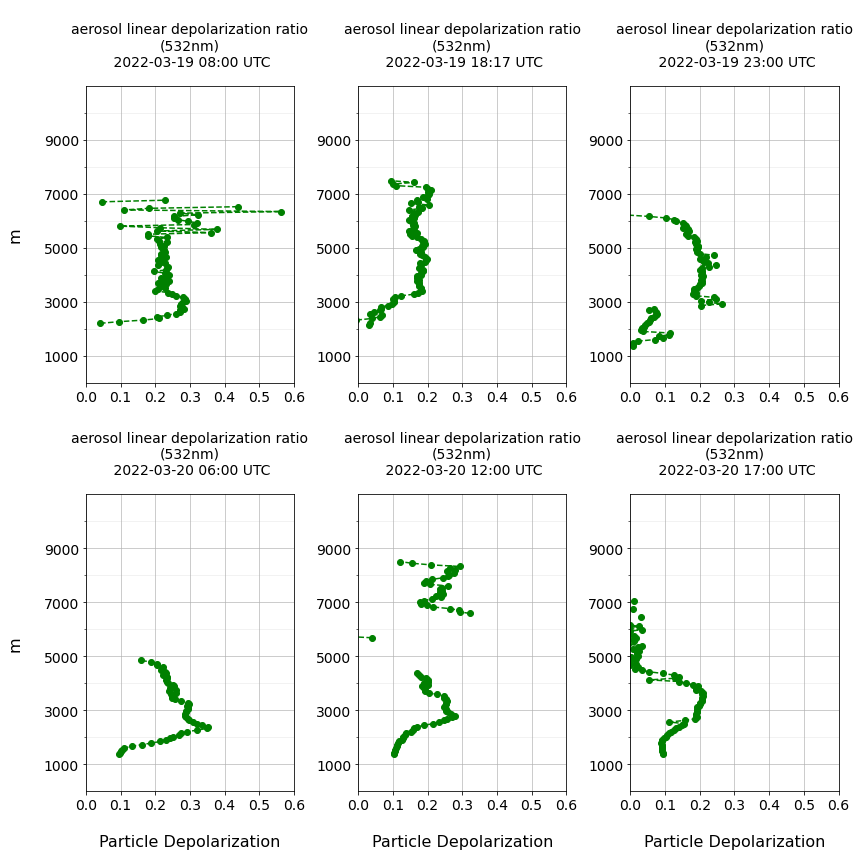

In [21]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(12,12))

########################
# 1st subplot
########################
ax1=plt.subplot(2,3,1)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax1.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax1.plot(particle_1903_0800_df['particledepolarization'], particle_1903_0800_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-19 08:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax1.set_yticks(major_yticks)
ax1.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.8)


########################
# 2nd subplot
########################

ax2=plt.subplot(2,3,2)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax2.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax2.plot(particle_1903_1817_df['particledepolarization'], particle_1903_1817_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-19 18:17 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax2.set_yticks(major_yticks)
ax2.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.8)


########################
# 3rd subplot
########################

ax3=plt.subplot(2,3,3)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax3.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax3.plot(particle_1903_2300_df['particledepolarization'], particle_1903_2300_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-19 23:00 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax3.set_yticks(major_yticks)
ax3.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.8)

########################
# 4th subplot
########################

ax4=plt.subplot(2,3,4)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax4.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax4.plot(particle_2003_0600_df['particledepolarization'], particle_2003_0600_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-20 06:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)
plt.xlabel('\nParticle Depolarization', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax4.set_yticks(major_yticks)
ax4.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.8)


########################
# 5th subplot
########################

ax5=plt.subplot(2,3,5)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax5.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax5.plot(particle_2003_1200_df['particledepolarization'], particle_2003_1200_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-20 12:00 UTC', fontsize=14, pad=20)
plt.xlabel('\nParticle Depolarization', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax5.set_yticks(major_yticks)
ax5.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.8)


########################
# 6th subplot
########################

ax6=plt.subplot(2,3,6)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax6.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax6.plot(particle_2003_1700_df['particledepolarization'], particle_2003_1700_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-20 17:00 UTC', fontsize=14, pad=20)
plt.xlabel('\nParticle Depolarization', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax6.set_yticks(major_yticks)
ax6.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax6.grid(which='minor', alpha=0.2)
ax6.grid(which='major', alpha=0.8)

###########

# Set tight layout to space subplots
fig.tight_layout()

### <a id='particle'></a>2. Use the example code to plot the 532nm backscatter EARLINET data for Granada, Spain

#### Load and browse 532nm aerosol backscatter coefficient profiles on 19 March 2022

EARLINET 532 backscatter data is downloaded in a zip archive and for this reason, we have to unzip the file before we can open it. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. You will see 20 new files appearing in a new folder called `earlinet` located in the same folder as this notebook. This is just for demonstration purposes.

In [22]:
#import zipfile
#with zipfile.ZipFile('../../eodata/dust/part2/2_observations/earlinet/level1/DATASET_1877.zip', 'r') as zip_ref:
#    zip_ref.extractall('./earlinet/')

EARLINET data are disseminated as hourly files in the `NetCDF` format. You can use the Python package [xarray](http://xarray.pydata.org/en/stable/) and the function `open_mfdataset()` to open multiple `NetCDF` at once, concatenating along the `time` dimension. Let us load the data files for the EARLINET station Granada, Spain for 19 March 2022.

The function loads the data as `Dataset`, which is a collection of multiple data variables that share the same coordinate information. Below, you see that the EARLINET data have four dimensions: `altitude`, `time`, `nv` and `wavelength`.

The data also hold 30 data variables, including a variable `backscatter`, which is the variable of interest for us. If you want to use the files you downloaded, please change the file path below.

In [23]:
earlinet_1903 = xr.open_mfdataset('../../eodata/dust/part2/2_observations/earlinet/level1/*20220319*.nc', 
                         concat_dim='time', 
                         combine='nested')
earlinet_1903

<xarray.Dataset>
Dimensions:                                         (altitude: 156, time: 11, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 1.37e+...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 532.0
    longitude                                       float32 -3.605
    latitude                                        float32 37.16
Dimensions without coordinates: nv
Data variables: (12/30)
    time_bounds                                     (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    error_retrieval_method                          (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                                              ...
    earlinet_product_type                           (time) float64 6.0 ... 6.0
    user_defined_category                           (time) float64 0.0 ... 0.0
    backscatter_calibration_range                   (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (time) float64 0.0 ... 0.0
    scc_product_type                                (time) float64 1.0 ... 1.0
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2022-03-29T07:43Z : Assigned versio...
    station_ID:                           gra
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           gra_008_0000669_202203190200_202203...
    overlap_correction_file:

EARLINET Lidar sensors create vertical profiles of the atmosphere. Let us inspect the variable `altitude` in order to see the resolution and extent of the vertical profile. You see that the EARLINET 532nm data offer measurements for every 60 meters from 1370m up to 10.55km.

In [24]:
earlinet_1903.altitude

<xarray.DataArray 'altitude' (altitude: 156)>
array([ 1370.,  1430.,  1490.,  1550.,  1610.,  1670.,  1730.,  1790.,  1850.,
        1910.,  1970.,  2030.,  2090.,  2150.,  2210.,  2270.,  2330.,  2390.,
        2450.,  2510.,  2570.,  2630.,  2690.,  2750.,  2810.,  2870.,  2930.,
        2990.,  3050.,  3110.,  3170.,  3230.,  3290.,  3350.,  3410.,  3470.,
        3530.,  3590.,  3650.,  3710.,  3770.,  3830.,  3890.,  3950.,  4010.,
        4070.,  4130.,  4190.,  4250.,  4310.,  4370.,  4430.,  4490.,  4550.,
        4610.,  4670.,  4730.,  4790.,  4850.,  4910.,  4970.,  5030.,  5090.,
        5150.,  5210.,  5270.,  5330.,  5390.,  5450.,  5510.,  5570.,  5630.,
        5690.,  5750.,  5810.,  5870.,  5930.,  5990.,  6050.,  6110.,  6170.,
        6230.,  6290.,  6350.,  6410.,  6470.,  6530.,  6590.,  6650.,  6710.,
        6770.,  6830.,  6890.,  6950.,  7010.,  7070.,  7130.,  7190.,  7250.,
        7310.,  7370.,  7430.,  7490.,  7550.,  7610.,  7670.,  7730.,  7790.,
        7850.,  7910.,  7970.,  8030.,  8090.,  8150.,  8210.,  8270.,  8330.,
        8390.,  8450.,  8510.,  8570.,  8630.,  8690.,  8750.,  8810.,  8870.,
        8930.,  8990.,  9050.,  9110.,  9170.,  9230.,  9290.,  9350.,  9410.,
        9470.,  9530.,  9590.,  9650.,  9710.,  9770.,  9830.,  9890.,  9950.,
       10010., 10070., 10130., 10190., 10250., 10310., 10370., 10430., 10490.,
       10550., 10610., 10670.])
Coordinates:
  * altitude   (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
    longitude  float32 -3.605
    latitude   float32 37.16
Attributes:
    axis:           Z
    long_name:      height above sea level
    positive:       up
    standard_name:  altitude
    units:          m

As a last step before we can visualize the vertical profile, we can load the variable `backscatter` from the dataset. You can load a variable from a xarray.Dataset by adding the name of the variable in square brackets.

The loaded data array provides you additional attributes about the data, such as `long_name` and `units`.

In [25]:
backscatter_1903 = earlinet_1903['backscatter']
backscatter_1903

<xarray.DataArray 'backscatter' (wavelength: 1, time: 11, altitude: 156)>
dask.array<concatenate, shape=(1, 11, 156), dtype=float64, chunksize=(1, 1, 156), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
  * time        (time) datetime64[ns] 2022-03-19T02:00:15 ... 2022-03-19T23:0...
  * wavelength  (wavelength) float32 532.0
    longitude   float32 -3.605
    latitude    float32 37.16
Attributes:
    ancillary_variables:  error_backscatter vertical_resolution
    long_name:            aerosol backscatter coefficient
    plausibility:         parameter passed the EARLINET quality assurance.
    units:                m-1*sr-1

#### Load and browse 532nm aerosol backscatter coefficient profiles on 20 March 2022

Let us now also load the backscatter profiles for the station in Granada, Spain for 20th March 2022 respectively. We repeat the same steps as above. First, we load the backscatter profile information as xarray.Dataset with the function `open_mfdataset()`.

In [26]:
earlinet_2003 = xr.open_mfdataset('../../eodata/dust/part2/2_observations/earlinet/level1/*20220320*.nc', 
                         concat_dim='time', 
                         combine='nested')

earlinet_2003

<xarray.Dataset>
Dimensions:                                         (altitude: 156, time: 9, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 1.37e+...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 532.0
    longitude                                       float32 -3.605
    latitude                                        float32 37.16
Dimensions without coordinates: nv
Data variables: (12/30)
    time_bounds                                     (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    error_retrieval_method                          (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                                              ...
    earlinet_product_type                           (time) float64 6.0 ... 6.0
    user_defined_category                           (time) float64 0.0 ... 0.0
    backscatter_calibration_range                   (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (time) float64 0.0 ... 0.0
    scc_product_type                                (time) float64 1.0 ... 1.0
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2022-03-29T07:42Z : Assigned versio...
    station_ID:                           gra
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           gra_008_0000669_202203200100_202203...
    overlap_correction_file:

In [27]:
backscatter_2003 = earlinet_2003['backscatter']
backscatter_2003

<xarray.DataArray 'backscatter' (wavelength: 1, time: 9, altitude: 156)>
dask.array<concatenate, shape=(1, 9, 156), dtype=float64, chunksize=(1, 1, 156), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
  * time        (time) datetime64[ns] 2022-03-20T01:00:36.999999744 ... 2022-...
  * wavelength  (wavelength) float32 532.0
    longitude   float32 -3.605
    latitude    float32 37.16
Attributes:
    ancillary_variables:  error_backscatter vertical_resolution
    long_name:            aerosol backscatter coefficient
    plausibility:         parameter passed the EARLINET quality assurance.
    units:                m-1*sr-1

#### Visualise the aerosol backscatter coefficient profiles in Granada, Spain for 19 and 20 March 2022

You can save the variables `backscatter_longname` for plotting later.

In [28]:
backscatter_longname = backscatter_2003.long_name
backscatter_longname

'aerosol backscatter coefficient'

Next, you will plot the profiles as a line chart for the following dates and times: 
   * 19 March 2022:
       * 08:00 UTC
       * 18:17 UTC
       * 23:00 UTC
   * 20 March 2022:
       * 06:00 UTC
       * 12:00 UTC
       * 17:00 UTC

Time-series information is better to handle via the Python library [Pandas](https://pandas.pydata.org/). You can use the function `to_dataframe()` to convert a xarray.DataArray into a pandas.DataFrame.

In [29]:
backscatter_1903_df = backscatter_1903.to_dataframe()
backscatter_1903_df

longitude   latitude   backscatter
wavelength time                altitude                                    
532.0      2022-03-19 02:00:15 1370.0       -3.605  37.164001  1.613777e-07
                               1430.0       -3.605  37.164001  5.589536e-08
                               1490.0       -3.605  37.164001           NaN
                               1550.0       -3.605  37.164001 -1.594840e-07
                               1610.0       -3.605  37.164001 -1.807126e-07
...                                            ...        ...           ...
           2022-03-19 23:00:39 10430.0      -3.605  37.164001           NaN
                               10490.0      -3.605  37.164001           NaN
                               10550.0      -3.605  37.164001           NaN
                               10610.0      -3.605  37.164001           NaN
                               10670.0      -3.605  37.164001           NaN

[1716 rows x 3 columns]

Next, you can filter for the three times on 19 March 2022 that will plot, namely 08:00 UTC, 18:17 UTC and 23:00 UTC.

In [30]:
backscatter_1903_0800_df = backscatter_1903_df.filter(like='08:00', axis=0)
backscatter_1903_0800_df

longitude   latitude  \
wavelength time                          altitude                         
532.0      2022-03-19 08:00:43.000000256 1370.0       -3.605  37.164001   
                                         1430.0       -3.605  37.164001   
                                         1490.0       -3.605  37.164001   
                                         1550.0       -3.605  37.164001   
                                         1610.0       -3.605  37.164001   
...                                                      ...        ...   
                                         10430.0      -3.605  37.164001   
                                         10490.0      -3.605  37.164001   
                                         10550.0      -3.605  37.164001   
                                         10610.0      -3.605  37.164001   
                                         10670.0      -3.605  37.164001   

                                                    backscatter  
wavelength time                          altitude                
532.0      2022-03-19 08:00:43.000000256 1370.0   -2.549289e-07  
                                         1430.0   -2.765183e-07  
                                         1490.0   -2.881536e-07  
                                         1550.0   -2.944902e-07  
                                         1610.0   -2.936216e-07  
...                                                         ...  
                                         10430.0            NaN  
                                         10490.0            NaN  
                                         10550.0            NaN  
                                         10610.0            NaN  
                                         10670.0            NaN  

[156 rows x 3 columns]

Now you can repeat this for all the other times.

In [31]:
backscatter_1903_1817_df = backscatter_1903_df.filter(like='18:17', axis=0)
backscatter_1903_2300_df = backscatter_1903_df.filter(like='23:00', axis=0)

Now you can repeat the above steps for the data from 20 March 2022.

In [32]:
backscatter_2003_df = backscatter_2003.to_dataframe()
backscatter_2003_df

longitude   latitude  \
wavelength time                          altitude                         
532.0      2022-03-20 01:00:36.999999744 1370.0       -3.605  37.164001   
                                         1430.0       -3.605  37.164001   
                                         1490.0       -3.605  37.164001   
                                         1550.0       -3.605  37.164001   
                                         1610.0       -3.605  37.164001   
...                                                      ...        ...   
           2022-03-20 17:00:10.000000000 10430.0      -3.605  37.164001   
                                         10490.0      -3.605  37.164001   
                                         10550.0      -3.605  37.164001   
                                         10610.0      -3.605  37.164001   
                                         10670.0      -3.605  37.164001   

                                                   backscatter  
wavelength time                          altitude               
532.0      2022-03-20 01:00:36.999999744 1370.0       0.000002  
                                         1430.0       0.000001  
                                         1490.0       0.000001  
                                         1550.0       0.000001  
                                         1610.0       0.000001  
...                                                        ...  
           2022-03-20 17:00:10.000000000 10430.0           NaN  
                                         10490.0           NaN  
                                         10550.0           NaN  
                                         10610.0           NaN  
                                         10670.0           NaN  

[1404 rows x 3 columns]

Next, you can filter for the three times on 20 March 2022 that will plot, namely 06:00 UTC, 12:00 UTC and 17:00 UTC.

In [33]:
backscatter_2003_0600_df = backscatter_2003_df.filter(like='06:00', axis=0)
backscatter_2003_1200_df = backscatter_2003_df.filter(like='12:00', axis=0)
backscatter_2003_1700_df = backscatter_2003_df.filter(like='17:00', axis=0)

You will notice that the resulting dataframe is a `MultiIndex` dataframe. To flatten this dataframe, we can use the pandas method `reset_index()`. 

In [34]:
backscatter_1903_0800_df = backscatter_1903_0800_df.reset_index()
backscatter_1903_0800_df

,wavelength,time,altitude,longitude,latitude,backscatter
0,532.0,2022-03-19 08:00:43.000000256,1370.0,-3.605,37.164001,-2.549289e-07
1,532.0,2022-03-19 08:00:43.000000256,1430.0,-3.605,37.164001,-2.765183e-07
2,532.0,2022-03-19 08:00:43.000000256,1490.0,-3.605,37.164001,-2.881536e-07
3,532.0,2022-03-19 08:00:43.000000256,1550.0,-3.605,37.164001,-2.944902e-07
4,532.0,2022-03-19 08:00:43.000000256,1610.0,-3.605,37.164001,-2.936216e-07
...,...,...,...,...,...,...
151,532.0,2022-03-19 08:00:43.000000256,10430.0,-3.605,37.164001,NaN
152,532.0,2022-03-19 08:00:43.000000256,10490.0,-3.605,37.164001,NaN
153,532.0,2022-03-19 08:00:43.000000256,10550.0,-3.605,37.164001,NaN
154,532.0,2022-03-19 08:00:43.000000256,10610.0,-3.605,37.164001,NaN


Now you can repeat this for all the other times.

In [35]:
backscatter_1903_1817_df = backscatter_1903_1817_df.reset_index()
backscatter_1903_2300_df = backscatter_1903_2300_df.reset_index()
backscatter_2003_0600_df = backscatter_2003_0600_df.reset_index()
backscatter_2003_1200_df = backscatter_2003_1200_df.reset_index()
backscatter_2003_1700_df = backscatter_2003_1700_df.reset_index()

Now, set the index to `altitude` using the pandas method `.set_index`.

In [36]:
backscatter_1903_0800_df = backscatter_1903_0800_df.set_index('altitude')
backscatter_1903_0800_df

,wavelength,time,longitude,latitude,backscatter
altitude,,,,,
1370.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,-2.549289e-07
1430.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,-2.765183e-07
1490.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,-2.881536e-07
1550.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,-2.944902e-07
1610.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,-2.936216e-07
...,...,...,...,...,...
10430.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
10490.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN
10550.0,532.0,2022-03-19 08:00:43.000000256,-3.605,37.164001,NaN


Repeat for all the other dataframes.

In [37]:
backscatter_1903_1817_df = backscatter_1903_1817_df.set_index('altitude')
backscatter_1903_2300_df = backscatter_1903_2300_df.set_index('altitude')
backscatter_2003_0600_df = backscatter_2003_0600_df.set_index('altitude')
backscatter_2003_1200_df = backscatter_2003_1200_df.set_index('altitude')
backscatter_2003_1700_df = backscatter_2003_1700_df.set_index('altitude')

#### Visualise the 532nm aerosol backscatter coefficient profiles in Granada, Spain for 19 and 20 March 2022

The next step is now to visualize the six aerosol backscatter coefficient profiles for both days next to each other. To do so, create six subplots with with `plt.subplot()`. By specifying `(2,3,1`), we create a plot with 2 rows and 3 columns and the third number indicates that this is the first plot of three in that row.

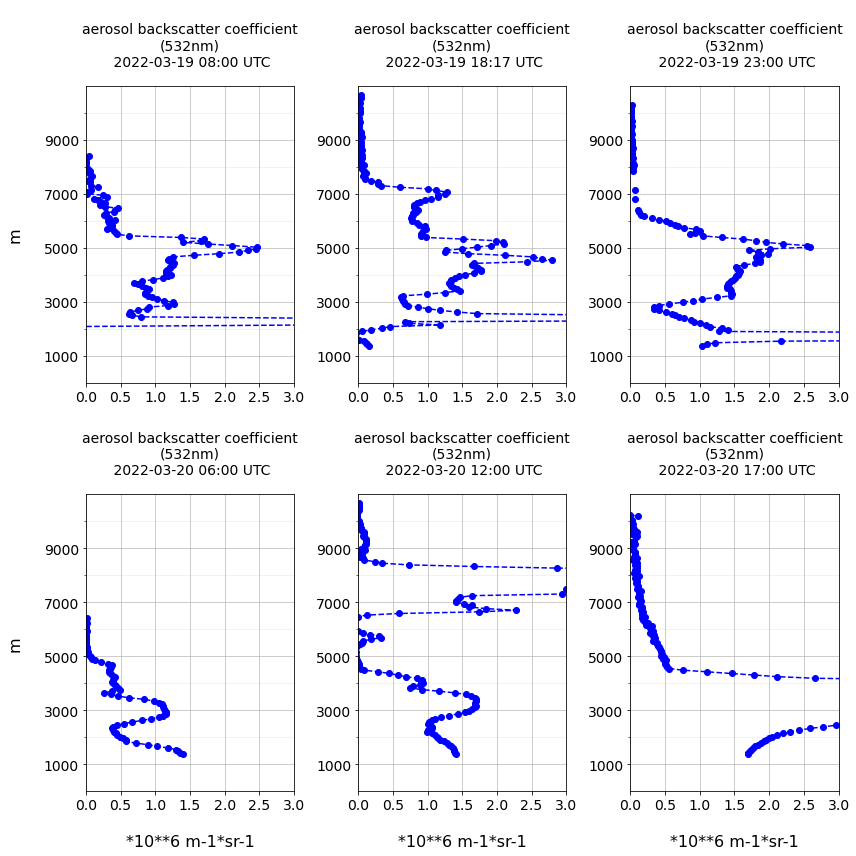

In [38]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(12,12))

########################
# 1st subplot
########################
ax1=plt.subplot(2,3,1)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax1.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax1.plot(backscatter_1903_0800_df['backscatter']*10**6, backscatter_1903_0800_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-19 08:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax1.set_yticks(major_yticks)
ax1.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.8)


########################
# 2nd subplot
########################

ax2=plt.subplot(2,3,2)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax2.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax2.plot(backscatter_1903_1817_df['backscatter']*10**6, backscatter_1903_1817_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-19 18:17 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax2.set_yticks(major_yticks)
ax2.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.8)


########################
# 3rd subplot
########################

ax3=plt.subplot(2,3,3)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax3.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax3.plot(backscatter_1903_2300_df['backscatter']*10**6, backscatter_1903_2300_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-19 23:00 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax3.set_yticks(major_yticks)
ax3.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.8)

########################
# 4th subplot
########################

ax4=plt.subplot(2,3,4)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax4.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax4.plot(backscatter_2003_0600_df['backscatter']*10**6, backscatter_2003_0600_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-20 06:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)
plt.xlabel('\n*10**6 ' + earlinet_2003['backscatter'].units, fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax4.set_yticks(major_yticks)
ax4.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.8)


########################
# 5th subplot
########################

ax5=plt.subplot(2,3,5)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax5.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax5.plot(backscatter_2003_1200_df['backscatter']*10**6, backscatter_2003_1200_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-20 12:00 UTC', fontsize=14, pad=20)
plt.xlabel('\n*10**6 ' + earlinet_2003['backscatter'].units, fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax5.set_yticks(major_yticks)
ax5.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.8)


########################
# 6th subplot
########################

ax6=plt.subplot(2,3,6)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax6.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax6.plot(backscatter_2003_1700_df['backscatter']*10**6, backscatter_2003_1700_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-20 17:00 UTC', fontsize=14, pad=20)
plt.xlabel('\n*10**6 ' + earlinet_2003['backscatter'].units, fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax6.set_yticks(major_yticks)
ax6.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax6.grid(which='minor', alpha=0.2)
ax6.grid(which='major', alpha=0.8)

###########

# Set tight layout to space subplots
fig.tight_layout()

<br>

### <a id='climatology'></a>3. [BONUS] Download and plot the climatological average profile for the March 2000-2019 period for Granada, Spain

#### Load and browse Level 3 EARLINET data

EARLINET Level 3 data is downloaded in a zip archive. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. You will see a set of folders with acronyms of station names appearing in a new folder called `./earlinet/level3` located in the same folder as this notebook. This is just for demonstration purposes.

In [39]:
#import zipfile
#with zipfile.ZipFile('../../eodata/dust/part2/2_observations/earlinet/level3/Profiles_Level3_relNov2022_1of3.zip', 'r') as zip_ref:
#    zip_ref.extractall('./earlinet/level3/')

In [40]:
#with zipfile.ZipFile('../../eodata/dust/part2/2_observations/earlinet/level3/Profiles_Level3_relNov2022_2of3.zip', 'r') as zip_ref:
#    zip_ref.extractall('./earlinet/level3/')

In [41]:
#with zipfile.ZipFile('../../eodata/dust/part2/2_observations/earlinet/level3/Profiles_Level3_relNov2022_3of3.zip', 'r') as zip_ref:
#    zip_ref.extractall('./earlinet/level3/')

The acronym for Granada, Spain is `gra`. If you open this folder you will see a set of netcdf files containing climatological profiles. We will use the normal monthly file which has `NorMon` in the filename.

In [42]:
earlinet_l3 = xr.open_mfdataset('../../eodata/dust/part2/2_observations/earlinet/level3/gra/*NorMon*.nc', 
                         concat_dim='time', 
                         combine='nested')
earlinet_l3

<xarray.Dataset>
Dimensions:                (altitude: 60, time: 12, wavelength: 3, stats: 5, nv: 2, n_char: 267107)
Coordinates:
  * altitude               (altitude) float64 200.0 400.0 ... 1.18e+04 1.2e+04
  * time                   (time) datetime64[ns] 2000-01-15T23:59:59 ... 2000...
  * wavelength             (wavelength) float64 355.0 532.0 1.064e+03
  * stats                  (stats) int32 0 1 2 3 4
  * nv                     (nv) int32 1 2
  * n_char                 (n_char) int32 1 2 3 4 ... 267105 267106 267107
Data variables:
    extinction             (stats, wavelength, time, altitude) float64 dask.array<chunksize=(5, 3, 12, 60), meta=np.ndarray>
    backscatter            (stats, wavelength, time, altitude) float64 dask.array<chunksize=(5, 3, 12, 60), meta=np.ndarray>
    volume_depolarization  (stats, wavelength, time, altitude) float64 dask.array<chunksize=(5, 3, 12, 60), meta=np.ndarray>
    time_bounds            (time, nv) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    source                 (time, n_char) |S1 dask.array<chunksize=(12, 267107), meta=np.ndarray>
    latitude               (time) float32 37.16 37.16 37.16 ... 37.16 37.16
    longitude              (time) float32 -3.605 -3.605 -3.605 ... -3.605 -3.605
    station_altitude       (time) float32 680.0 680.0 680.0 ... 680.0 680.0
Attributes: (12/30)
    processor_name:                       EAR_clim_v1.exe
    processor_version:                    
    processor_institution:                CNR - IMAA
    system:                               Raymetrics LR321-D400 ; UGR LR331-D400
    location:                             Granada, Spain
    institution:                          Andalusian Institute for Earth Syst...
    ...                                   ...
    conventions:                          C.F. - 1.8
    references:                           link doc earlinet.org
    station_ID:                           gra
    __file_format_version:                
    history:                              2022-09-21 16:17:56Generated by fre...
    title:                                Monthly average profile measurement...

Next, select the variable of interest, which is `backscatter`.

In [43]:
backscatter_l3 = earlinet_l3['backscatter']
backscatter_l3

<xarray.DataArray 'backscatter' (stats: 5, wavelength: 3, time: 12, altitude: 60)>
dask.array<open_dataset-8acfe16629f7966665445d26a0d2c3c9backscatter, shape=(5, 3, 12, 60), dtype=float64, chunksize=(5, 3, 12, 60), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 200.0 400.0 600.0 ... 1.18e+04 1.2e+04
  * time        (time) datetime64[ns] 2000-01-15T23:59:59 ... 2000-12-15T23:5...
  * wavelength  (wavelength) float64 355.0 532.0 1.064e+03
  * stats       (stats) int32 0 1 2 3 4
Attributes:
    units:      1/m*sr
    long_name:  mean of aerosol particle backscatter coefficient

You can save the `units` and `long_name` attributes as variables for plotting later.

In [44]:
backscatter_l3_units = backscatter_l3.units
backscatter_l3_longname = backscatter_l3.long_name

The normal monthly data has the following altitude levels:

In [45]:
backscatter_l3.altitude

<xarray.DataArray 'altitude' (altitude: 60)>
array([  200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,  1600.,  1800.,
        2000.,  2200.,  2400.,  2600.,  2800.,  3000.,  3200.,  3400.,  3600.,
        3800.,  4000.,  4200.,  4400.,  4600.,  4800.,  5000.,  5200.,  5400.,
        5600.,  5800.,  6000.,  6200.,  6400.,  6600.,  6800.,  7000.,  7200.,
        7400.,  7600.,  7800.,  8000.,  8200.,  8400.,  8600.,  8800.,  9000.,
        9200.,  9400.,  9600.,  9800., 10000., 10200., 10400., 10600., 10800.,
       11000., 11200., 11400., 11600., 11800., 12000.])
Coordinates:
  * altitude  (altitude) float64 200.0 400.0 600.0 ... 1.16e+04 1.18e+04 1.2e+04
Attributes:
    units:          m
    long_name:      Altitude of middle point of layer
    axis:           Z
    positive:       up
    standard_name:  altitude

The normal monthly data has the following timestamps:

In [46]:
backscatter_l3.time

<xarray.DataArray 'time' (time: 12)>
array(['2000-01-15T23:59:59.000000000', '2000-02-14T23:59:59.000000000',
       '2000-03-15T23:59:59.000000000', '2000-04-15T23:59:59.000000000',
       '2000-05-15T23:59:59.000000000', '2000-06-15T23:59:59.000000000',
       '2000-07-15T23:59:59.000000000', '2000-08-15T23:59:59.000000000',
       '2000-09-15T23:59:59.000000000', '2000-10-15T23:59:59.000000000',
       '2000-11-15T23:59:59.000000000', '2000-12-15T23:59:59.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15T23:59:59 ... 2000-12-15T23:59:59
Attributes:
    long_name:      Time
    axis:           T
    standard_name:  time
    bounds:         time_bounds

Time-series information is better to handle via the Python library [Pandas](https://pandas.pydata.org/). You can use the function `to_dataframe()` to convert a xarray.DataArray into a pandas.DataFrame.

In [47]:
backscatter_l3_df = backscatter_l3.to_dataframe()
backscatter_l3_df

backscatter
stats wavelength time                altitude             
0     355.0      2000-01-15 23:59:59 200.0             NaN
                                     400.0             NaN
                                     600.0             NaN
                                     800.0             NaN
                                     1000.0       0.000003
...                                                    ...
4     1064.0     2000-12-15 23:59:59 11200.0     14.000000
                                     11400.0     14.000000
                                     11600.0     12.000000
                                     11800.0     12.000000
                                     12000.0     12.000000

[10800 rows x 1 columns]

Next, you can filter for the normal monthly data from the month of March.

In [48]:
backscatter_l3_mar_df = backscatter_l3_df.filter(like='2000-03-15', axis=0)
backscatter_l3_mar_df

backscatter
stats wavelength time                altitude             
0     355.0      2000-03-15 23:59:59 200.0             NaN
                                     400.0             NaN
                                     600.0             NaN
                                     800.0             NaN
                                     1000.0       0.000002
...                                                    ...
4     1064.0     2000-03-15 23:59:59 11200.0     40.000000
                                     11400.0     40.000000
                                     11600.0     40.000000
                                     11800.0     40.000000
                                     12000.0     40.000000

[900 rows x 1 columns]

Next, you can filter for the normal monthly data for the 532nm wavelength.

In [49]:
backscatter_l3_mar_532_df = backscatter_l3_mar_df.filter(like='532.0', axis=0)
backscatter_l3_mar_532_df

backscatter
stats wavelength time                altitude             
0     532.0      2000-03-15 23:59:59 200.0             NaN
                                     400.0             NaN
                                     600.0             NaN
                                     800.0             NaN
                                     1000.0            NaN
...                                                    ...
4     532.0      2000-03-15 23:59:59 11200.0          53.0
                                     11400.0          53.0
                                     11600.0          53.0
                                     11800.0          53.0
                                     12000.0          53.0

[300 rows x 1 columns]

Next, you can filter for the normal monthly data for the mean statistic, where the `stats` variable has a value of 0. You can use the pandas `query` method to query the column.

In [50]:
backscatter_l3_mar_532_0_df = backscatter_l3_mar_532_df.query("stats == 0")
backscatter_l3_mar_532_0_df

backscatter
stats wavelength time                altitude              
0     532.0      2000-03-15 23:59:59 200.0              NaN
                                     400.0              NaN
                                     600.0              NaN
                                     800.0              NaN
                                     1000.0             NaN
                                     1200.0    1.385400e-06
                                     1400.0    1.143670e-06
                                     1600.0    9.794890e-07
                                     1800.0    8.943480e-07
                                     2000.0    7.747960e-07
                                     2200.0    5.895090e-07
                                     2400.0    4.990910e-07
                                     2600.0    5.029420e-07
                                     2800.0    4.612840e-07
                                     3000.0    4.287670e-07
                                     3200.0    5.191760e-07
                                     3400.0    3.743440e-07
                                     3600.0    2.942830e-07
                                     3800.0    2.419690e-07
                                     4000.0    1.997500e-07
                                     4200.0    1.510220e-07
                                     4400.0    1.432260e-07
                                     4600.0    1.160070e-07
                                     4800.0    9.565840e-08
                                     5000.0    8.021780e-08
                                     5200.0    7.149070e-08
                                     5400.0    7.071480e-08
                                     5600.0    7.031090e-08
                                     5800.0    6.816750e-08
                                     6000.0    6.782750e-08
                                     6200.0    8.263660e-08
                                     6400.0    9.054180e-08
                                     6600.0    9.216010e-08
                                     6800.0    9.140420e-08
                                     7000.0    9.984140e-08
                                     7200.0    1.189110e-07
                                     7400.0    1.262580e-07
                                     7600.0    1.272480e-07
                                     7800.0    1.346910e-07
                                     8000.0    1.209000e-07
                                     8200.0    1.115030e-07
                                     8400.0    7.895860e-08
                                     8600.0    5.469000e-08
                                     8800.0    5.437330e-08
                                     9000.0    5.212820e-08
                                     9200.0    5.114100e-08
                                     9400.0    4.998010e-08
                                     9600.0    4.074390e-08
                                     9800.0    3.996810e-08
                                     10000.0   4.485760e-08
                                     10200.0   4.084750e-08
                                     10400.0   4.381840e-08
                                     10600.0   3.635360e-08
                                     10800.0   3.370990e-08
                                     11000.0   2.811010e-08
                                     11200.0   3.032080e-08
                                     11400.0   3.298150e-08
                                     11600.0   2.645540e-08
                                     11800.0   1.876130e-08
                                     12000.0   3.115350e-08

You will notice that the resulting dataframe is a `MultiIndex` dataframe. To flatten this dataframe, we can use the pandas method `reset_index()`. 

In [51]:
backscatter_l3_mar_532_0_df = backscatter_l3_mar_532_0_df.reset_index()
backscatter_l3_mar_532_0_df

,stats,wavelength,time,altitude,backscatter
0,0,532.0,2000-03-15 23:59:59,200.0,NaN
1,0,532.0,2000-03-15 23:59:59,400.0,NaN
2,0,532.0,2000-03-15 23:59:59,600.0,NaN
3,0,532.0,2000-03-15 23:59:59,800.0,NaN
4,0,532.0,2000-03-15 23:59:59,1000.0,NaN
5,0,532.0,2000-03-15 23:59:59,1200.0,1.385400e-06
6,0,532.0,2000-03-15 23:59:59,1400.0,1.143670e-06
7,0,532.0,2000-03-15 23:59:59,1600.0,9.794890e-07
8,0,532.0,2000-03-15 23:59:59,1800.0,8.943480e-07
9,0,532.0,2000-03-15 23:59:59,2000.0,7.747960e-07


Now, set the index to `altitude` using the pandas method `.set_index`.

In [52]:
backscatter_l3_mar_532_0_df= backscatter_l3_mar_532_0_df.set_index('altitude')
backscatter_l3_mar_532_0_df

,stats,wavelength,time,backscatter
altitude,,,,
200.0,0,532.0,2000-03-15 23:59:59,NaN
400.0,0,532.0,2000-03-15 23:59:59,NaN
600.0,0,532.0,2000-03-15 23:59:59,NaN
800.0,0,532.0,2000-03-15 23:59:59,NaN
1000.0,0,532.0,2000-03-15 23:59:59,NaN
1200.0,0,532.0,2000-03-15 23:59:59,1.385400e-06
1400.0,0,532.0,2000-03-15 23:59:59,1.143670e-06
1600.0,0,532.0,2000-03-15 23:59:59,9.794890e-07
1800.0,0,532.0,2000-03-15 23:59:59,8.943480e-07


The next step is to visualize the normal climatology for the month of March.

You can use the built-in `plot()` function of the pandas library to define a line plot. The visualisation code below consists of five main parts:
* `Initiate a matplotlib figure`
* `Define a line plot with the built-in plot function of the pandas library`
* `Set title and axes label information`
* `Format axes ticks`
* `Add additional features, such as a grid or legend`

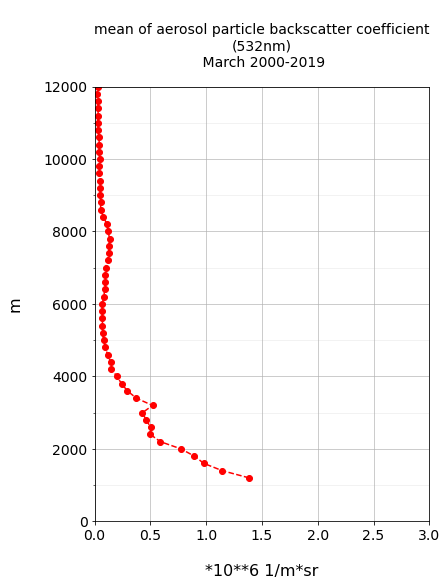

In [53]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(6,8))
ax = plt.axes()

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--')

# Set title and axes lable information
plt.title('\n' + backscatter_l3_longname + '\n(532nm)' + '\n March 2000-2019', fontsize=14, pad=20)
plt.ylabel(backscatter_l3.altitude.units+'\n', fontsize=16)
plt.xlabel('\n*10**6 ' + backscatter_l3_units, fontsize=16)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(0, 13000, 2000)
minor_yticks = np.arange(0, 13000, 1000)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)

plt.show()

You can also add this climatology to the plots we made earlier of the aerosol backscatter coefficient for 19 - 20 March 2022.

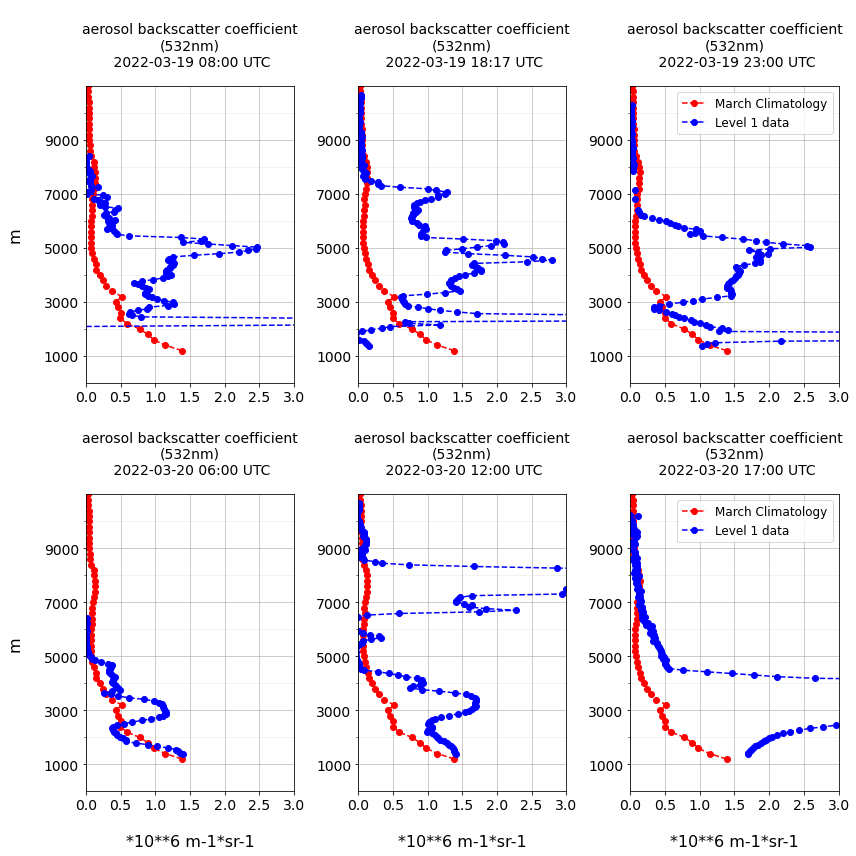

In [65]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(12,12))

########################
# 1st subplot
########################
ax1=plt.subplot(2,3,1)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax1.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax1.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--')
ax1.plot(backscatter_1903_0800_df['backscatter']*10**6, backscatter_1903_0800_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-19 08:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax1.set_yticks(major_yticks)
ax1.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.8)


########################
# 2nd subplot
########################

ax2=plt.subplot(2,3,2)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax2.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax2.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--')
ax2.plot(backscatter_1903_1817_df['backscatter']*10**6, backscatter_1903_1817_df.index, 'bo--')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-19 18:17 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax2.set_yticks(major_yticks)
ax2.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.8)


########################
# 3rd subplot
########################

ax3=plt.subplot(2,3,3)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax3.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax3.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--', label='March Climatology')
ax3.plot(backscatter_1903_2300_df['backscatter']*10**6, backscatter_1903_2300_df.index, 'bo--', label='Level 1 data')

# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-19 23:00 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax3.set_yticks(major_yticks)
ax3.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.8)

# Add additionally a legend and grid to the plot
ax3.legend(fontsize=12,loc=0)

########################
# 4th subplot
########################

ax4=plt.subplot(2,3,4)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax4.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax4.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--')
ax4.plot(backscatter_2003_0600_df['backscatter']*10**6, backscatter_2003_0600_df.index, 'bo--')


# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-20 06:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)
plt.xlabel('\n*10**6 ' + earlinet_2003['backscatter'].units, fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax4.set_yticks(major_yticks)
ax4.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.8)


########################
# 5th subplot
########################

ax5=plt.subplot(2,3,5)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax5.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax5.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--')
ax5.plot(backscatter_2003_1200_df['backscatter']*10**6, backscatter_2003_1200_df.index, 'bo--')



# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-20 12:00 UTC', fontsize=14, pad=20)
plt.xlabel('\n*10**6 ' + earlinet_2003['backscatter'].units, fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax5.set_yticks(major_yticks)
ax5.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.8)


########################
# 6th subplot
########################

ax6=plt.subplot(2,3,6)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax6.axis([0, 3, 0, 11000]);

# Select pandas dataframe columns and define a line plot for the aerosol backscatter coefficient
ax6.plot(backscatter_l3_mar_532_0_df['backscatter']*10**6, backscatter_l3_mar_532_0_df.index, 'ro--', label='March Climatology')
ax6.plot(backscatter_2003_1700_df['backscatter']*10**6, backscatter_2003_1700_df.index, 'bo--', label='Level 1 data')


# Set title and axes lable information
plt.title('\n' + backscatter_longname + '\n(532nm)' + '\n 2022-03-20 17:00 UTC', fontsize=14, pad=20)
plt.xlabel('\n*10**6 ' + earlinet_2003['backscatter'].units, fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax6.set_yticks(major_yticks)
ax6.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax6.grid(which='minor', alpha=0.2)
ax6.grid(which='major', alpha=0.8)

# Add additionally a legend and grid to the plot
ax6.legend(fontsize=12,loc=0)

###########

# Set tight layout to space subplots
fig.tight_layout()

## <hr>

### <a id='eea_download'></a>4. Write code for downloading EEA Air Quality data for PM10 for Spain in 2022

The Python library `airbase` allows you to download all EEA Air Quality data for a country at once. You can specify which pollutant, country and time period you want to download. Read more about the library [here](https://airbase.readthedocs.io/en/latest/). Due to the large file sizes, it is recommended to download data for each country and pollutant (PM10) separately. We have predownloaded data for Spain for you.

The first step is to store the `airbase` client in a variable called `client`.

In [55]:
client = airbase.AirbaseClient()

Next, we define a download request by stating which country, pollutant and year we want the data from. The abbreviation for Spain is `"ES"` and the pollutant is `"PM10"`. We only want data from `2022`, so we specify both, the `year_from` and `year_to` as `2022`. 

By using the function `download_to_file()`, all the 382 resulting CSVs are concatenated into a single CSV file called `ES_PM10_2022.csv`. Each CSV contains data from a single station. It is recommended to download all the data for a country into one CSV to make it easier to search for a station using the station code. You are able to change the file name to anything you wish. We also specify where the data should be stored by stating the file path `"./ES_PM10_2022.csv"`. 

We have commented out the code as these data have already been downloaded for you.

In [56]:
#r = client.request(country="ES", pl="PM10", year_from=2022, year_to=2022)
#r.download_to_file("./ES_PM10_2022_cat.csv")

<br>

### <a id='resample_aeronet'></a>5. Plot the PM10 data for the month of March 2022 near Granada, Spain

Let us start by looking at PM10. The EEA air quality station closest to Granada, Spain is named `Motril`. It is located in Motril, Spain and has the code `ES1370A`.

The file has the name `ES_PM10_2022.csv`. You can read `csv` files with the function `read_table()` from the Python library `pandas`. We can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index
* `low_memory`: this is set to `False` in this case to avoid mixed type interference

Because the data is stored in a comma-separated values file, the delimiter is set to `,`. The first row of the file contains the header information, thus we set the header value to `[0]`. Finally, we set the index column to be the 5th column in the file, which is the `AirQualityStationEoICode`.

You see below that the resulting dataframe has 3130810 rows and 16 columns.

In [57]:
df = pd.read_table('../../eodata/dust/part2/2_observations/eea/ES_PM10_2022.csv', delimiter=',', header=[0], index_col=4, low_memory=False)
df

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
AirQualityStationEoICode,,,,,,,,,,,,,,,,
ES1927A,ES,ES.BDCA.AQD,NET_ES208A,STA_ES1927A,SP_49275002_10_49,SPP_49275002_10_49.1,SAM_49275002_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,10.0,µg/m3,2022-01-01 01:00:00 +01:00,2022-01-01 02:00:00 +01:00,1,3
ES1927A,ES,ES.BDCA.AQD,NET_ES208A,STA_ES1927A,SP_49275002_10_49,SPP_49275002_10_49.1,SAM_49275002_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,5.0,µg/m3,2022-01-01 02:00:00 +01:00,2022-01-01 03:00:00 +01:00,1,3
ES1927A,ES,ES.BDCA.AQD,NET_ES208A,STA_ES1927A,SP_49275002_10_49,SPP_49275002_10_49.1,SAM_49275002_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,8.0,µg/m3,2022-01-01 03:00:00 +01:00,2022-01-01 04:00:00 +01:00,1,3
ES1927A,ES,ES.BDCA.AQD,NET_ES208A,STA_ES1927A,SP_49275002_10_49,SPP_49275002_10_49.1,SAM_49275002_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,3.0,µg/m3,2022-01-01 04:00:00 +01:00,2022-01-01 05:00:00 +01:00,1,3
ES1927A,ES,ES.BDCA.AQD,NET_ES208A,STA_ES1927A,SP_49275002_10_49,SPP_49275002_10_49.1,SAM_49275002_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,9.0,µg/m3,2022-01-01 05:00:00 +01:00,2022-01-01 06:00:00 +01:00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES2014A,ES,ES.BDCA.AQD,NET_ES212A,STA_ES2014A,SP_32039001_10_49,SPP_32039001_10_49.1,SAM_32039001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,6.7,µg/m3,2022-12-30 18:00:00 +01:00,2022-12-30 19:00:00 +01:00,1,3
ES2014A,ES,ES.BDCA.AQD,NET_ES212A,STA_ES2014A,SP_32039001_10_49,SPP_32039001_10_49.1,SAM_32039001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,12.0,µg/m3,2022-12-30 19:00:00 +01:00,2022-12-30 20:00:00 +01:00,1,3
ES2014A,ES,ES.BDCA.AQD,NET_ES212A,STA_ES2014A,SP_32039001_10_49,SPP_32039001_10_49.1,SAM_32039001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,11.0,µg/m3,2022-12-30 20:00:00 +01:00,2022-12-30 21:00:00 +01:00,1,3


Next, we filter the dataframe for rows which contain the code `ES1370A`.

In [58]:
df = df.filter(like='ES1370A', axis=0)
df

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
AirQualityStationEoICode,,,,,,,,,,,,,,,,
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,35.64,µg/m3,2022-01-01 01:00:00 +01:00,2022-01-01 02:00:00 +01:00,1,3
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,31.32,µg/m3,2022-01-01 02:00:00 +01:00,2022-01-01 03:00:00 +01:00,1,3
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,23.76,µg/m3,2022-01-01 03:00:00 +01:00,2022-01-01 04:00:00 +01:00,1,3
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,18.36,µg/m3,2022-01-01 04:00:00 +01:00,2022-01-01 05:00:00 +01:00,1,3
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,22.68,µg/m3,2022-01-01 05:00:00 +01:00,2022-01-01 06:00:00 +01:00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,NaN,µg/m3,2022-12-29 09:00:00 +01:00,2022-12-29 10:00:00 +01:00,-1,3
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,NaN,µg/m3,2022-12-29 10:00:00 +01:00,2022-12-29 11:00:00 +01:00,-1,3
ES1370A,ES,ES.BDCA.AQD,NET_ES201A,STA_ES1370A,SP_18140001_10_49,SPP_18140001_10_49.1,SAM_18140001_10_49,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,NaN,µg/m3,2022-12-29 11:00:00 +01:00,2022-12-29 12:00:00 +01:00,-1,3


Then, we select only columns that contain data of interest, the `Concentration` of PM10 and `DatetimeBegin`, and reorder them so that `DatetimeBegin` is the first column.

In [59]:
# select columns by name
df = df.filter(items=['Concentration','DatetimeBegin'])

# Reset DataFrame with columns in desired order
df = df[['DatetimeBegin','Concentration']]
df

,DatetimeBegin,Concentration
AirQualityStationEoICode,,
ES1370A,2022-01-01 01:00:00 +01:00,35.64
ES1370A,2022-01-01 02:00:00 +01:00,31.32
ES1370A,2022-01-01 03:00:00 +01:00,23.76
ES1370A,2022-01-01 04:00:00 +01:00,18.36
ES1370A,2022-01-01 05:00:00 +01:00,22.68
...,...,...
ES1370A,2022-12-29 09:00:00 +01:00,NaN
ES1370A,2022-12-29 10:00:00 +01:00,NaN
ES1370A,2022-12-29 11:00:00 +01:00,NaN


Now, let us change the index column to the start time column `DatetimeBegin` by using `set_index()`. Then we will resample the hourly data into daily data using `.resample()`, passing in `D` for day, and `.mean()` to calculate the mean. 

Finally, in order to differentiate the data later on, we rename the column from `Concentration` to `PM10`.

In [60]:
# Set date column as index 
df = df.set_index('DatetimeBegin')

# Converting the Index to a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Resample hourly data to daily mean of PM10
pm10_daily = df.resample('D').mean()

# Rename Concentration column
pm10_daily.rename(columns={'Concentration': 'PM10'}, inplace=True)
pm10_daily


,PM10
DatetimeBegin,
2022-01-01 00:00:00+01:00,27.234783
2022-01-02 00:00:00+01:00,25.605000
2022-01-03 00:00:00+01:00,31.663636
2022-01-04 00:00:00+01:00,31.958182
2022-01-05 00:00:00+01:00,8.145000
...,...
2022-12-26 00:00:00+01:00,17.853333
2022-12-27 00:00:00+01:00,26.736667
2022-12-28 00:00:00+01:00,23.183333


Because we are interested in plotting only data for March 2022, we have to filter the PM10 data frame further. Using `.index.to_series()` enables us to turn the `DatetimeIndex` into a series. We then can pass the start date of `2022-03-31` and the end date of `2022-03-31` to the `.between()` method to filter this series to March 2022.

In [61]:
pm10_Mar2022 = pm10_daily[pm10_daily.index.to_series().between('2022-03-01', '2022-3-31')]
pm10_Mar2022

,PM10
DatetimeBegin,
2022-03-01 00:00:00+01:00,16.470000
2022-03-02 00:00:00+01:00,18.000000
2022-03-03 00:00:00+01:00,25.380000
2022-03-04 00:00:00+01:00,NaN
2022-03-05 00:00:00+01:00,NaN
2022-03-06 00:00:00+01:00,NaN
2022-03-07 00:00:00+01:00,17.010000
2022-03-08 00:00:00+01:00,16.200000
2022-03-09 00:00:00+01:00,9.965455


The next step is to visualize all points of PM10 at Motril, Spain for March 2022. 

You can use the built-in `plot()` function of the pandas library to define a line plot. With the `filter` function, you can select the dataframe columns you wish to visualize. The visualisation code below consists of five main parts:
* `Initiate a matplotlib figure`
* `Define a line plot with the built-in plot function of the pandas library`
* `Set title and axes label information`
* `Format axes ticks`
* `Add additional features, such as a grid or legend`

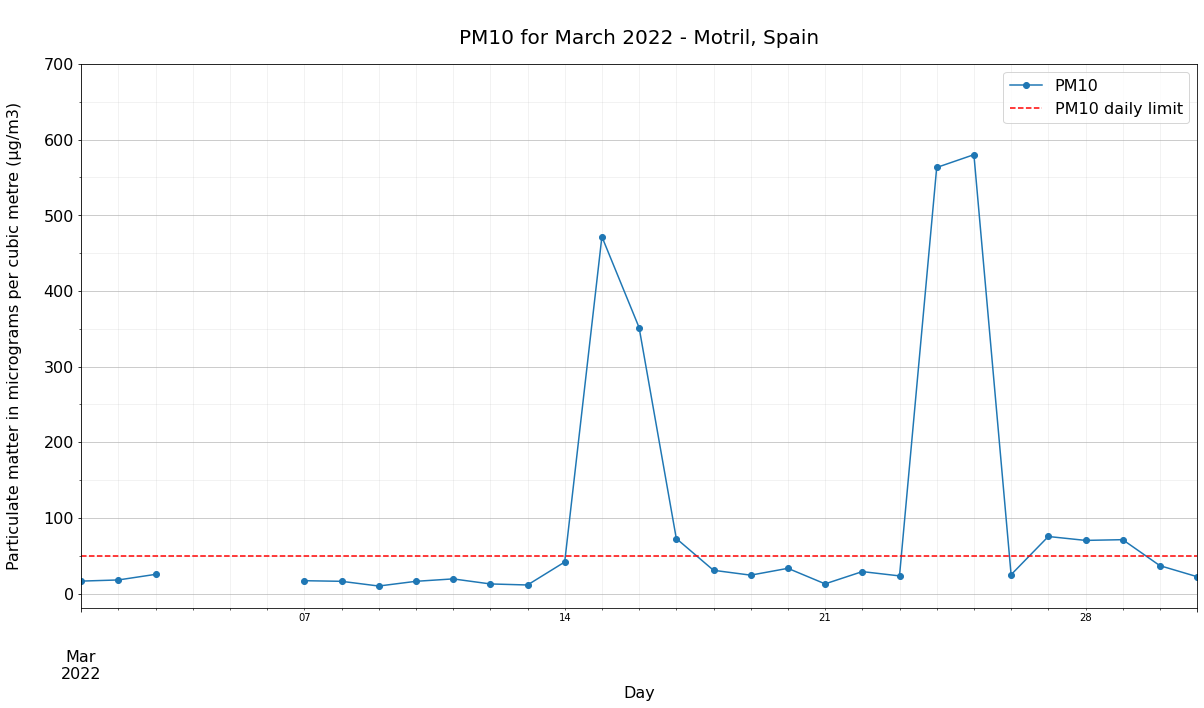

In [62]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Select pandas dataframe columns and define a line plot for PM10 and PM2.5 each
pm10_Mar2022.filter(['PM10']).plot(ax=ax, style='o-', label='PM10')
plt.axhline(y=50, color='red', linestyle='dashed', label='PM10 daily limit')

# Set title and axes lable information
plt.title('\nPM10 for March 2022 - Motril, Spain', fontsize=20, pad=20)
plt.ylabel('Particulate matter in micrograms per cubic metre (µg/m3)\n', fontsize=16)

plt.xlabel('Day', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set major ticks on the y-axis every 100, minor ticks every 50
major_ticks = np.arange(0, 701, 100)
minor_ticks = np.arange(0, 701, 50)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# Use different settings for the grids
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=16,loc=0)
plt.show()

<br>

<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>